# Visualising Data

A fundamental part of the data scientist's toolkit is data visualisation.
Although it is very easy to create visualisations, it is a lot harder to produce *good* ones. 

There are two primary uses for data visualisation:
* To *explore* data
* To *communicate* data

### Matplotlib

If you are interested in producing elaborate interactive visualisations for the web, this is likely not the right choice, however for simple bar charts, line charts and scatterplots, it works pretty well.

In [1]:
from matplotlib import pyplot as plt

In [2]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

In [3]:
# Create a line chart, years on x-axis, gdp on y-axis

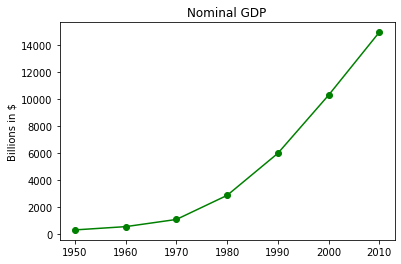

In [6]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title('Nominal GDP')

# add a label to the y-axis
plt.ylabel('Billions in $')
plt.show;

**Bar charts**

A bar chart is a good choice when you want to show how some quantity varies among some *discrete* set of items. 
For instance, Figure 3-2 shows how many Academy Awards were won by each of a variety of movies:

In [7]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Ghandi", "West Side Story", ]
num_oscars = [5, 11, 3, 8, 10]

In [8]:
# Plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]

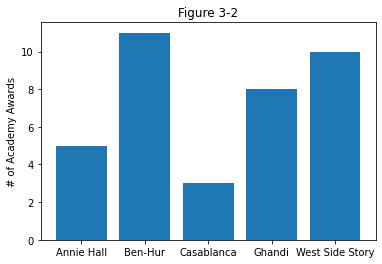

In [9]:
plt.bar(range(len(movies)), num_oscars)

plt.title('Figure 3-2') # adds title
plt.ylabel('# of Academy Awards') # Label the y-axis

# label x-axis with movie names at bar centres
plt.xticks(range(len(movies)), movies)

plt.show();

A bar chart can also be a good choice for plotting histograms of bucketed numeric values, as in the next chart. This helps to visually explore how the values are distributed:

In [10]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

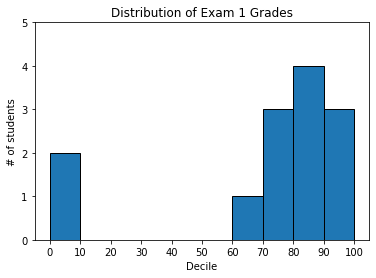

In [12]:
# Bucket grades by decile, but put 100 in with the 90s

histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],    # Shifts bars right by 5
         histogram.values(),                 # Give each bar its correct height
         10,                                 # Give each bar a width of 10
         edgecolor=(0, 0, 0))                # Black edges for each bar


plt.axis([-5, 105, 0, 5])                    # x-axis from -5 to 105
                                             # y-axis from 0 to 5
    
plt.xticks([10 * i for i in range(11)])      # x-axis labels at 0, 10, ..., 100
plt.xlabel('Decile')
plt.ylabel('# of students')
plt.title('Distribution of Exam 1 Grades')
plt.show();